In [2]:
!pip install -Uqq fastbook
!pip install DuckDuckGoImages
 # https://pypi.org/project/DuckDuckGoImages/

You should consider upgrading via the 'C:\Users\TCUDIKEL\Anaconda3\envs\venv-fastai\python.exe -m pip install --upgrade pip' command.


In [ ]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
import DuckDuckGoImages as ddg

Mounted at /content/gdrive


### Get grizzly bear images

In [ ]:
#!git clone https://github.com/samuel-cavalcanti/DuckDuckGo-Image-Search-API.git
#!python ddg_img_search_api/setup.py install # python3.7.5

#!npm i -g ddg-images-cli
#!ddg-images-cli

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# ddg.download('grizzly bears', max_urls=10, thumbnails=True, folder="" )

6

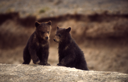

In [ ]:
dest = "/content/gdrive/MyDrive/fastai/bears/00109.jpg"
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('/content/gdrive/MyDrive/fastai')

In [ ]:
if not path.exists():
  path.mkdir()
for o in bear_types:
  dest = (path/o)
  # print(dest)
  # print(f'{o} bear')
  dest.mkdir(exist_ok=True)
  #results = search_images_bing(key, f'{o} bear')
  #download_images(dest, urls=results.attrgot('contentUrl'))
  ddg.download(f'{o} bear', max_urls=100, thumbnails=True, folder=dest)

In [ ]:
fns = get_image_files(path)
fns

(#595) [Path('/content/gdrive/MyDrive/fastai/grizzly/d0e4c34c7e4f4738a8850912e9e6d85e.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/6c8522569ee84dca87cf833521fb15c1.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/96364e31635f41569e0d859f90199649.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/307a537a6cfe42858cc1608da007c4da.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/4cd988cc0630421a9e32320b963cb6fb.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/e23dd03bd07b43498f92a88046117ae5.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/51d1b782067544ae92c4796d2ef590a1.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/c95e132d95f24cc6aa3dc39e0213efdd.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/c0c02003f41a4350a93ecfeb2f9bfa64.jpg'),Path('/content/gdrive/MyDrive/fastai/grizzly/f8c5dd6a172248ef81c0edf7daf8f22a.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
??verify_images

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

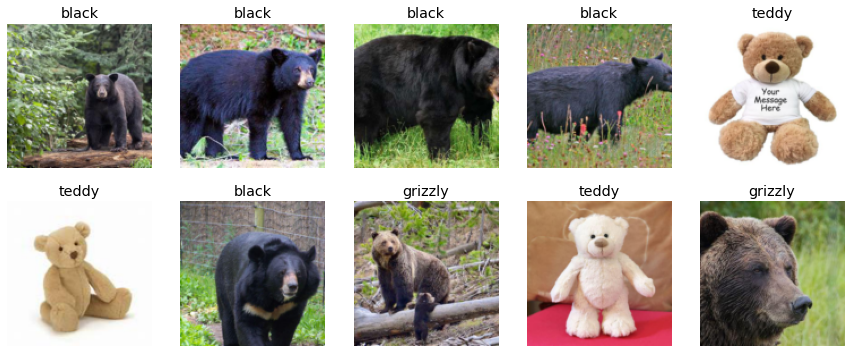

In [ ]:
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

### you can ask fastai to pad the images with zeros (black), or squish/stretch them:

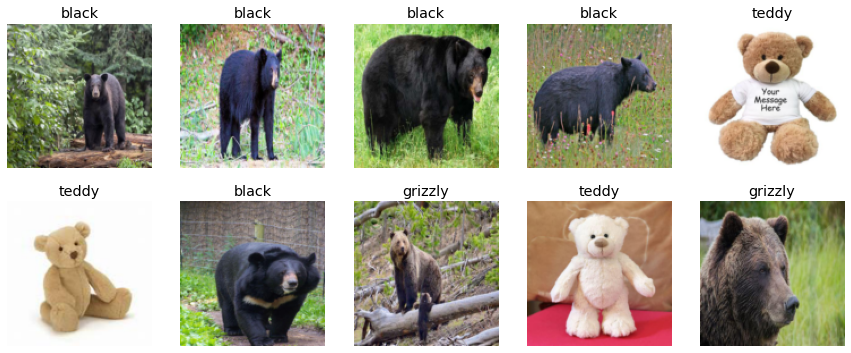

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

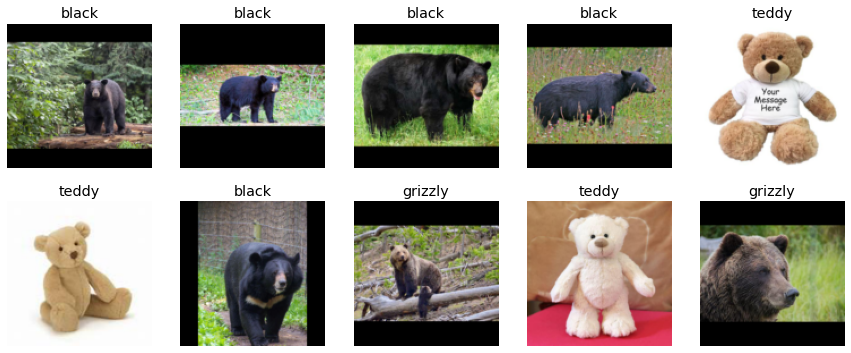

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

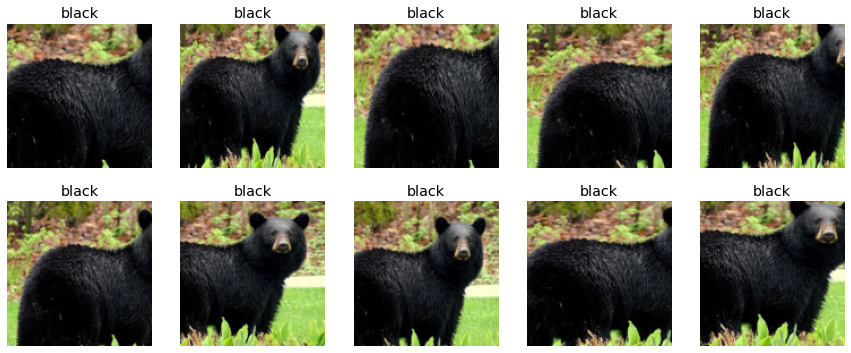

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=10, nrows=2, unique=True)

### Data Augmentation

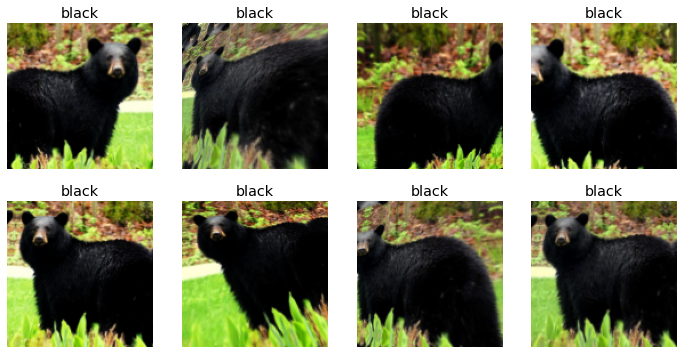

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Train 

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


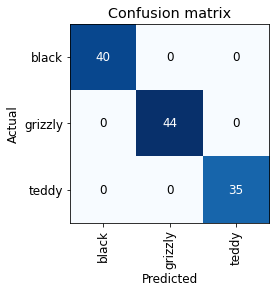

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### plot_top_losses shows us the images with the highest loss in our dataset: 
each image is labeled with four things: prediction, actual (target label), loss, and probability

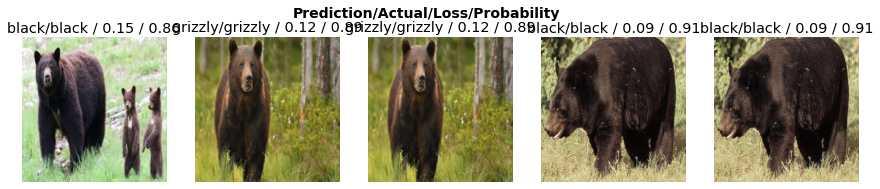

In [ ]:
interp.plot_top_losses(5, nrows=1)

### GUI Data Cleaner

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# to delete (unlink) all images selected for deletion, we would run:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

# To move images for which we've selected a different category, we would run:
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Create an App for deployment

In [8]:
!pip install voila

  Using cached voila-0.2.4-py3-none-any.whl (1.9 MB)
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached jupyter_server-1.1.4-py3-none-any.whl (184 kB)


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

spyder 4.0.1 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.0.1 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
spyder 4.0.1 requires jedi==0.14.1, but you'll have jedi 0.17.2 which is incompatible.
nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
You should consider upgrading via the 'C:\Users\TCUDIKEL\Anaconda3\envs\venv-fastai\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


In [9]:
!jupyter serverextension enable --sys-prefix voila 

Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: C:\Users\TCUDIKEL\Anaconda3\envs\venv-fastai\etc\jupyter
    - Validating...
      voila 0.2.4 ok
